In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [78]:
data = pd.read_csv("personal_fitness_data.csv")

In [79]:
df = pd.DataFrame(data)

In [80]:
df.head()

,date,user_id,gender,age,height_cm,weight_kg,steps,active_minutes,calories_burned,resting_heart_rate,sleep_hours,stress_level,diet_quality,water_intake_liters,fitness_score,weight_change_kg,goal_achieved
0,2024-01-01,1,Male,41,168.715879,72.429308,9999.0,111.419964,681.895458,83.321885,3.933092,Low,Average,1.339309,1.000000,-0.066944,1
1,2024-01-02,1,Male,41,168.715879,72.429308,3520.0,43.238755,288.308484,82.993177,8.201243,Medium,Average,2.541601,0.367875,0.264223,0
2,2024-01-03,1,Male,41,168.715879,72.429308,6414.0,77.225131,532.469803,87.645690,8.411202,Medium,Good,2.629034,0.926609,-0.081358,1
3,2024-01-04,1,Male,41,168.715879,72.429308,7291.0,55.359292,465.134204,71.933543,9.247692,Low,Good,0.767591,0.486208,0.111357,0
4,2024-01-05,1,Male,41,168.715879,72.429308,8955.0,84.703863,656.359453,68.170112,7.554739,Medium,Poor,1.788902,1.000000,0.043747,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 36000 non-null  object 
 1   user_id              36000 non-null  int64  
 2   gender               36000 non-null  object 
 3   age                  36000 non-null  int64  
 4   height_cm            36000 non-null  float64
 5   weight_kg            36000 non-null  float64
 6   steps                34200 non-null  float64
 7   active_minutes       36000 non-null  float64
 8   calories_burned      36000 non-null  float64
 9   resting_heart_rate   34200 non-null  float64
 10  sleep_hours          34200 non-null  float64
 11  stress_level         36000 non-null  object 
 12  diet_quality         36000 non-null  object 
 13  water_intake_liters  34200 non-null  float64
 14  fitness_score        36000 non-null  float64
 15  weight_change_kg     36000 non-null 

In [82]:
df.isna().sum()

date                      0
user_id                   0
gender                    0
age                       0
height_cm                 0
weight_kg                 0
steps                  1800
active_minutes            0
calories_burned           0
resting_heart_rate     1800
sleep_hours            1800
stress_level              0
diet_quality              0
water_intake_liters    1800
fitness_score             0
weight_change_kg          0
goal_achieved             0
dtype: int64

In [83]:
df.duplicated().sum()

np.int64(0)

In [84]:
df.duplicated(subset=["date","user_id"]).sum()

np.int64(0)

In [85]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [86]:
df["date"] = pd.to_datetime(df["date"])

In [87]:
df.tail()

,date,user_id,gender,age,height_cm,weight_kg,steps,active_minutes,calories_burned,resting_heart_rate,sleep_hours,stress_level,diet_quality,water_intake_liters,fitness_score,weight_change_kg,goal_achieved
35995,2024-06-24,200,Female,53,160.120642,79.916471,3012.0,51.249617,249.039344,59.958649,6.633160,Medium,Average,1.805694,0.547239,-0.027928,0
35996,2024-06-25,200,Female,53,160.120642,79.916471,6265.0,57.271349,329.590216,80.211786,5.227593,Low,Poor,1.239040,0.526116,0.281883,0
35997,2024-06-26,200,Female,53,160.120642,79.916471,8147.0,65.952836,543.673861,72.416532,9.086064,High,Average,1.507083,0.728304,0.144189,1
35998,2024-06-27,200,Female,53,160.120642,79.916471,9971.0,108.733603,747.126596,80.486936,6.762952,Low,Good,1.782164,0.812105,0.154253,1
35999,2024-06-28,200,Female,53,160.120642,79.916471,9081.0,83.197234,586.177542,70.859721,6.539575,Medium,Good,NaN,0.932146,0.004968,1


In [88]:
m = df.describe()

In [89]:
columns = df.columns

In [90]:
missing_data_columns = []
for i in columns:
    if df[i].isna().sum() != 0:
        missing_data_columns.append(i)
print(missing_data_columns)

['steps', 'resting_heart_rate', 'sleep_hours', 'water_intake_liters']


In [91]:
df[missing_data_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   steps                34200 non-null  float64
 1   resting_heart_rate   34200 non-null  float64
 2   sleep_hours          34200 non-null  float64
 3   water_intake_liters  34200 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [56]:
gender_grouped = df.groupby("gender")
for i in missing_data_columns:
    df[i] = df[i].fillna(gender_grouped[i].transform("mean")).fillna(df[i].mean())

In [96]:
print("Average steps: ",gender_grouped['steps'].mean())

gender
Female    7653.510302
Male      7655.658363
Other     7632.896060
Name: steps, dtype: float64

In [101]:
print("Average: ",gender_grouped['resting_heart_rate'].mean())
print()
print("Average: ",gender_grouped['sleep_hours'].mean())
print()
print("Average: ",gender_grouped['water_intake_liters'].mean())
print()
print("Average fitness Score: ", gender_grouped["fitness_score"].mean())

Average:  gender
Female    70.041062
Male      70.067761
Other     69.683389
Name: resting_heart_rate, dtype: float64

Average:  gender
Female    6.993813
Male      7.007276
Other     7.011593
Name: sleep_hours, dtype: float64

Average:  gender
Female    2.194039
Male      2.190124
Other     2.162216
Name: water_intake_liters, dtype: float64

Average fitness Score:  gender
Female    0.673687
Male      0.679282
Other     0.676203
Name: fitness_score, dtype: float64


In [57]:
df = pd.get_dummies(df, columns=["gender"], drop_first=False)

In [58]:
df.head()

,date,user_id,age,height_cm,weight_kg,steps,active_minutes,calories_burned,resting_heart_rate,sleep_hours,stress_level,diet_quality,water_intake_liters,fitness_score,weight_change_kg,goal_achieved,gender_Female,gender_Male,gender_Other
0,2024-01-01,1,41,168.715879,72.429308,9999.0,111.419964,681.895458,83.321885,3.933092,Low,Average,1.339309,1.000000,-0.066944,1,False,True,False
1,2024-01-02,1,41,168.715879,72.429308,3520.0,43.238755,288.308484,82.993177,8.201243,Medium,Average,2.541601,0.367875,0.264223,0,False,True,False
2,2024-01-03,1,41,168.715879,72.429308,6414.0,77.225131,532.469803,87.645690,8.411202,Medium,Good,2.629034,0.926609,-0.081358,1,False,True,False
3,2024-01-04,1,41,168.715879,72.429308,7291.0,55.359292,465.134204,71.933543,9.247692,Low,Good,0.767591,0.486208,0.111357,0,False,True,False
4,2024-01-05,1,41,168.715879,72.429308,8955.0,84.703863,656.359453,68.170112,7.554739,Medium,Poor,1.788902,1.000000,0.043747,1,False,True,False


In [59]:
df["stress_level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [60]:
df["diet_quality"].unique()

array(['Average', 'Good', 'Poor'], dtype=object)

In [61]:
stress_map = {'Low':1,
               'Medium':2, 
               'High':3}

In [62]:
diet_map = {
    "Poor":1,
    "Average":2,
    "Good":3
}

In [63]:
df["stress_level"] = df["stress_level"].map(stress_map)
df["diet_quality"] = df["diet_quality"].map(diet_map)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 36000 non-null  datetime64[ns]
 1   user_id              36000 non-null  int64         
 2   age                  36000 non-null  int64         
 3   height_cm            36000 non-null  float64       
 4   weight_kg            36000 non-null  float64       
 5   steps                36000 non-null  float64       
 6   active_minutes       36000 non-null  float64       
 7   calories_burned      36000 non-null  float64       
 8   resting_heart_rate   36000 non-null  float64       
 9   sleep_hours          36000 non-null  float64       
 10  stress_level         36000 non-null  int64         
 11  diet_quality         36000 non-null  int64         
 12  water_intake_liters  36000 non-null  float64       
 13  fitness_score        36000 non-

In [66]:
corr = df.corr()

In [67]:
print(corr)

                             date       user_id           age     height_cm  \
date                 1.000000e+00  5.569602e-13 -6.904244e-14 -5.459296e-14   
user_id              5.569602e-13  1.000000e+00 -5.248998e-02 -1.067762e-01   
age                 -6.904244e-14 -5.248998e-02  1.000000e+00  2.045734e-02   
height_cm           -5.459296e-14 -1.067762e-01  2.045734e-02  1.000000e+00   
weight_kg           -5.030922e-14  2.715969e-04 -1.318804e-01  2.763458e-02   
steps               -2.448536e-03  8.009395e-03 -2.389469e-03  2.378866e-03   
active_minutes       1.375632e-04  4.423971e-03  2.920758e-03  6.796578e-03   
calories_burned      2.631221e-04  7.060947e-03  1.846949e-03  6.558109e-03   
resting_heart_rate  -6.205958e-03 -1.023463e-02  1.996335e-03  3.925530e-03   
sleep_hours          3.122893e-03  1.392920e-03  5.951790e-03 -3.028928e-03   
stress_level         3.480502e-03  1.914467e-03 -3.946034e-03 -2.930999e-03   
diet_quality         5.224908e-03 -9.601633e-03  2.2

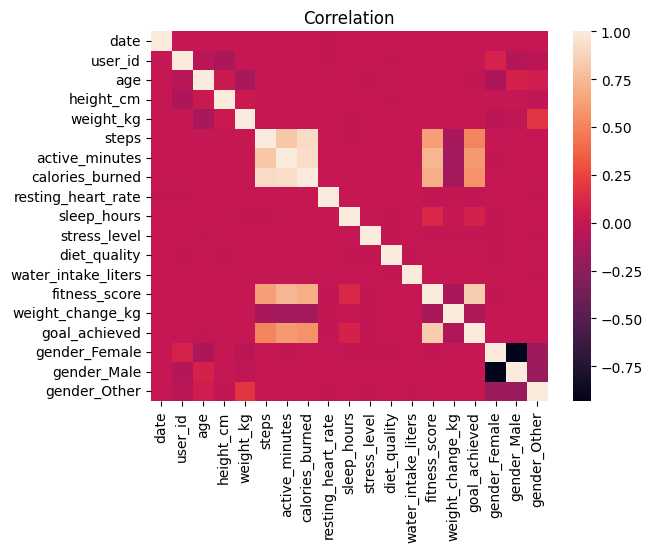

In [71]:
sns.heatmap(corr)
plt.title("Correlation")
plt.savefig("charts/corr")
plt.show()

In [74]:
df.groupby("gender_Male")["diet_quality"].mean()

gender_Male
False    2.051743
True     2.054195
Name: diet_quality, dtype: float64